In [2]:
import fastai
import os

print(fastai.__version__)
print(os.getenv("PYTORCH_ENABLE_MPS_FALLBACK"))

# https://github.com/microsoft/vscode-jupyter/issues/13163
from IPython.display import clear_output, DisplayHandle


def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)


DisplayHandle.update = update_patch

2.7.12
1


In [3]:
from fastai.vision.all import *
from pathlib import Path
import pandas as pd

In [5]:
df = pd.read_csv("labels.csv")
df.tail(5)

,filename,label
795,British_Shorthair_21.jpg,cat
796,Siamese_149.jpg,cat
797,Siamese_89.jpg,cat
798,Birman_156.jpg,cat
799,Abyssinian_228.jpg,cat


In [6]:
def get_x(x):
    return Path("data") / x["filename"]


def get_y(x):
    return x["label"]

In [9]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    # splitter=TrainTestSplitter(test_size=0.2, random_state=42, stratify=df["label"]),
    splitter=TrainTestSplitter(test_size=0.2, random_state=42, stratify=df["label"]),
    item_tfms=[RandomResizedCrop(224 + 40, min_scale=0.35)],
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
)


Setting-up type transforms pipelines
0    img-a0597963-343c-4a36-989b-0cc0e409d84a  nocat
1    img-16ee8d52-2177-495a-87e8-f7fa6c151954  nocat
2    img-b522ffe9-9782-43f7-9161-edbccda5dd42  nocat
3    img-7e613dd5-fb25-4669-bc34-fbbc32ad0542  nocat
4    img-4bded52e-129f-4794-ad70-1e003a363110  nocat
..                                        ...    ...
795                  British_Shorthair_21.jpg    cat
796                           Siamese_149.jpg    cat
797                            Siamese_89.jpg    cat
798                            Birman_156.jpg    cat
799                        Abyssinian_228.jpg    cat

[800 rows x 2 columns]
Found 800 items
2 datasets of sizes 640,160
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      filename    Ragdoll_168.jpg
label                   cat
Name: 721, dtype: object
    applying g

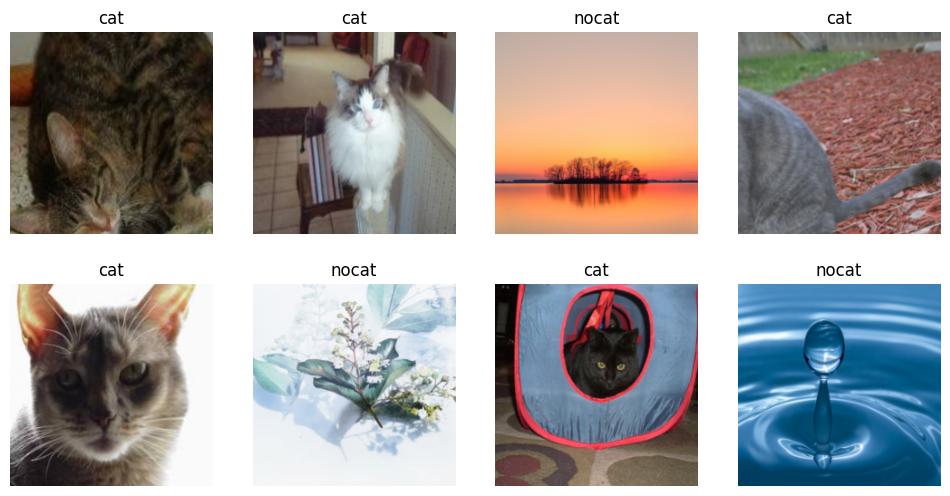

In [11]:
dblock.summary(df, show_batch=True, bs=8)